使用 RBF(radial basis function) Kernel 之非線性 SVC 去做二元分類
- 預測出 XOR 的輸入分佈
- 並用 Color Map 去繪製出分類的決策邊界及區域。

https://machine-learning-python.kspax.io/ex1_non_linear_svm/ex1_non_linear_svm
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## 生成資料

In [5]:
xx, yy = np.meshgrid(np.linspace(-3,3,500),np.linspace(-3,3,500))#生成網格點
np.random.seed(0)
X = np.random.randn(300,2)# 取 300*2 個隨機數，平均為0，標準差為1
Y = np.logical_xor(X[:,0]>0,X[:,1]>0)

## SVM model

In [6]:
## fit the model
clf = svm.NuSVC()
clf.fit(X,Y)

NuSVC()

<ipython-input-11-7b57c7295834>:9: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx,yy,Z,levels=[0],linewidths=2,linetypes='--')


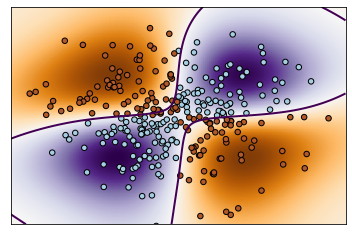

In [11]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z,interpolation='nearest',
          extent=(xx.min(),xx.max(),yy.min(),yy.max()),
          aspect='auto',
          origin='lower',
          cmap=plt.cm.PuOr_r)
contours = plt.contour(xx,yy,Z,levels=[0],linewidths=2,linetypes='--')
plt.scatter(X[:,0],X[:,1],s=30,c=Y,cmap=plt.cm.Paired,edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3,3,-3,3])
plt.show()